# Polylines are just numbers

By [Allison Parrish](https://www.decontextualize.com/)

In this notebook, I review some methods for manipulating polylines: transforming them and filtering them. Before proceeding, I advise you to review [this notebook on drawing with vsketch](lines-and-asemic-vsketch.ipynb) and install the vsketch and Bezmerizing libraries.

In [1]:
import vsketch
from bezmerizing import Polyline
import numpy as np
from numpy.random import uniform, normal
import random

## Doing math on polylines

We've been representing polylines so far as a Python list of lists. For example:

In [2]:
pline = [[10, -30], [-15, -10], [-20, 10], [-10, 30], [25, 45], [55, 0], [20, -10]]

This is a polyline with a number of points, each of which is represented as a list with two items (one for the X coordinate, the other for the Y coordinate.) As a quick review, here's how to draw this polyline with vsketch (make sure to install vsketch before proceeding):

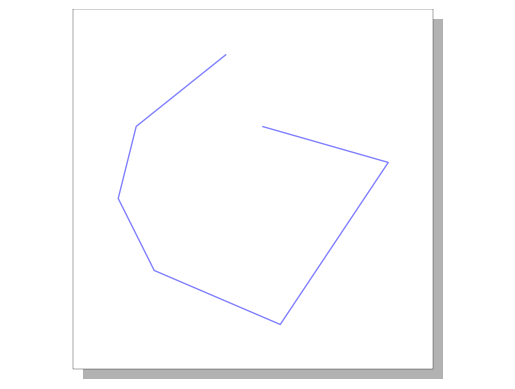

In [3]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.polygon(pline)
vsk.display()

We already discussed how to transform how a polyline is drawn using vsketch's `.pushMatrix()` method and the various transformation functions like `.translate()`, `.rotate()`, and `.scale()`:

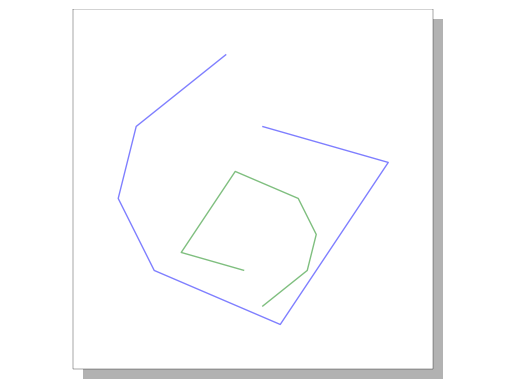

In [4]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pline)
with vsk.pushMatrix():
    vsk.stroke(2)
    vsk.translate(25, 25) # move over and down
    vsk.rotate(-np.pi) # rotate -180 degrees
    vsk.scale(0.5) # half size
    vsk.polygon(pline)
vsk.display()

This is all well and good! It turns out that we can accomplish these same transformations by doing math on the polylines directly, which also opens up a few other powerful techniques for manipulating polylines beyond the three basic transformation functions (translate, rotate, scale).

To illustrate: you can translate a polyline by adding a fixed value to each coordinate of the polyline. Here's how to do that in Python, using a `for` loop:

In [5]:
pline_translated = []
for coord in pline:
    pline_translated.append([coord[0]+5, coord[1]+5])

And the same thing with a list comprehension:

In [6]:
pline_translated = [[x+5, y+5] for x, y in pline]

If we draw both of these polylines, you can see that the new polyline that we've constructed is a "translation" of the original:

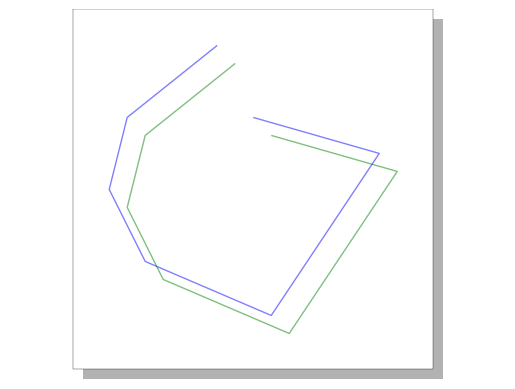

In [7]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pline)
vsk.stroke(2)
vsk.polygon(pline_translated)
vsk.display()

You can use the same basic idiom to scale a polyline:

In [8]:
pline_scaled = [[x*0.5, y*0.5] for x, y in pline]

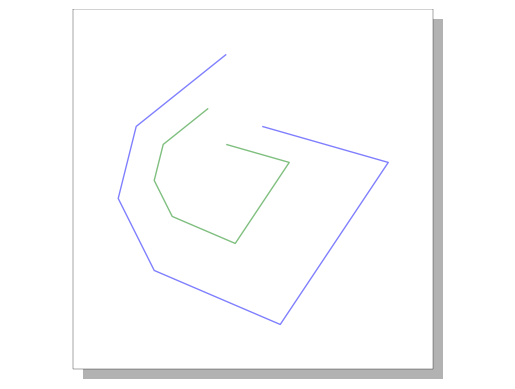

In [9]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pline)
vsk.stroke(2)
vsk.polygon(pline_scaled)
vsk.display()

Rotation is a bit trickier, but we can still do it with the same idiom:

In [10]:
t = np.pi * -0.5 # 90 degrees counter-clockwise
pline_rotated = [[x*np.cos(t)-y*np.sin(t), x*np.sin(t)+y*np.cos(t)] for x, y in pline]

(For the curious, the formula in the list comprehension above is the [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix).)

Here's what it looks like:

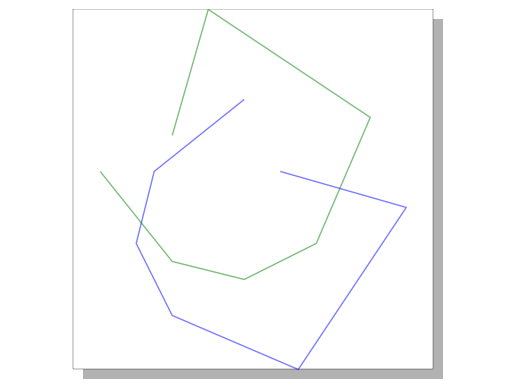

In [11]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pline)
vsk.stroke(2)
vsk.polygon(pline_rotated)
vsk.display()

### Gluing together polylines

Representing polylines as lists has another advantage: we can take two polylines and "glue" them together, simply by concatenating the lists that represent those polylines. For example, here's another polyline:

In [12]:
pline2 = [[45, -25], [55, -10], [65, -25]]

And here's that polyline, drawn along with our first polyline:

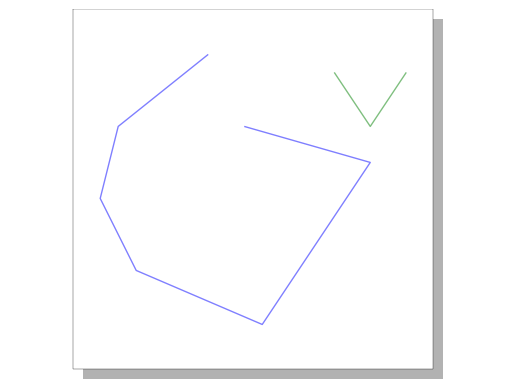

In [13]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pline)
vsk.stroke(2)
vsk.polygon(pline2)
vsk.display()

You can combine these two polylines into a single polyline using the `+` operator, which, when both its operands are lists, returns a new list with all of the elements of the original list:

In [14]:
pline_combo = pline + pline2

In [15]:
pline_combo

[[10, -30],
 [-15, -10],
 [-20, 10],
 [-10, 30],
 [25, 45],
 [55, 0],
 [20, -10],
 [45, -25],
 [55, -10],
 [65, -25]]

The number of points in the new polyline is exactly the sum of the number of points of the two polylines that came together to create it:

In [16]:
len(pline_combo)

10

In [17]:
len(pline) + len(pline2)

10

Here's what the new polyline looks like:

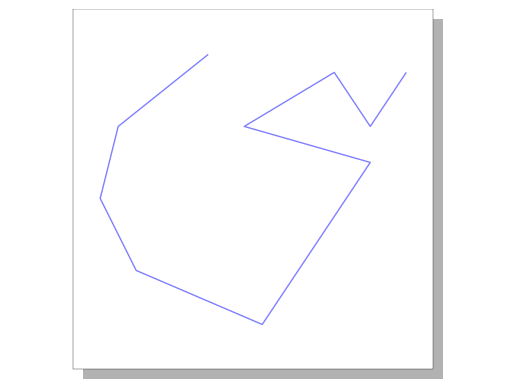

In [18]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pline_combo)
vsk.display()

### Polyline transformations with Bezmerizing

The Bezmerizing library's `Polyline` class has a method for each of these transformations, which returns another `Polyline` with that transformation applied:

In [19]:
bzline = Polyline(pline)
bzline_rotated = bzline.rotate(np.pi * -0.5)
bzline_translated = bzline.translate(-10, 5)
bzline_scaled = bzline.scale(0.75)

And here's what those look like. (Remember that you need to get the actual vertices of a `Polyline` object with its `.vertices` attribute if you want to draw the polyline with vsketch.)

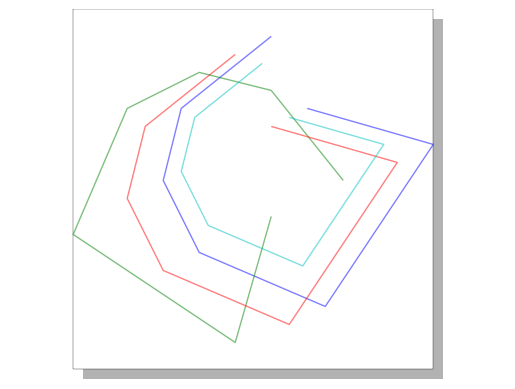

In [20]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(bzline.vertices)
vsk.stroke(2)
vsk.polygon(bzline_rotated.vertices)
vsk.stroke(3)
vsk.polygon(bzline_translated.vertices)
vsk.stroke(4)
vsk.polygon(bzline_scaled.vertices)
vsk.display()

Oh, and by the way, you can combine two `Polyline` objects with the `+` operator as well:

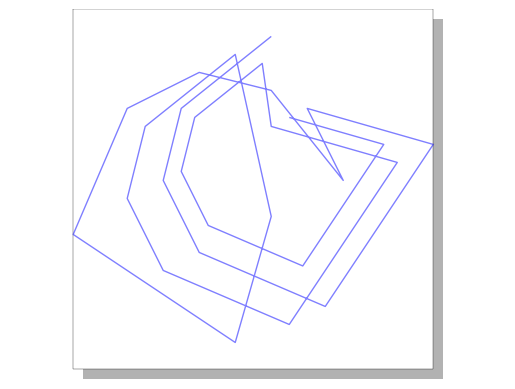

In [21]:
bzline_combo = bzline + bzline_rotated + bzline_translated + bzline_scaled
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.polygon(bzline_combo.vertices) # one big line!
vsk.display()

## More sophisticated transformations

All of this seems pretty goofy, since it's just duplicating what we can already do with vsketch's transformation functions. But stick with me here. In this section, I'm going to show some examples of transformations that you can perform on polylines that are more sophisticated than your basic rotates, translates and scales.

First, I'm going to make a more interesting polyline by taking the polyline formed by the Catmull-Rom spline of our example polylines:

In [22]:
pts = Polyline(pline_combo).catmull_spline(-0.5).to_polyline(20)

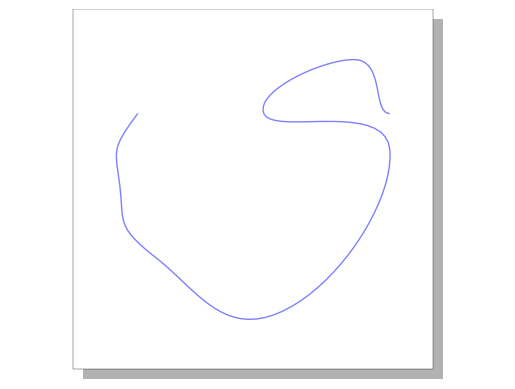

In [23]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.polygon(pts)
vsk.display()

### Making polylines noisy

One thing we can do with this polyline is add a little bit of noise to each point, like so:

In [24]:
noisy_pts = []
for coord in pts:
    noisy_pts.append([coord[0]+uniform(-1, 1), coord[1]+uniform(-1, 1)])

This code is creating a new polyline based on the original, in which a small random number (drawn from a uniform distribution) is added to each point. We end up with a line that is a bit squiggly:

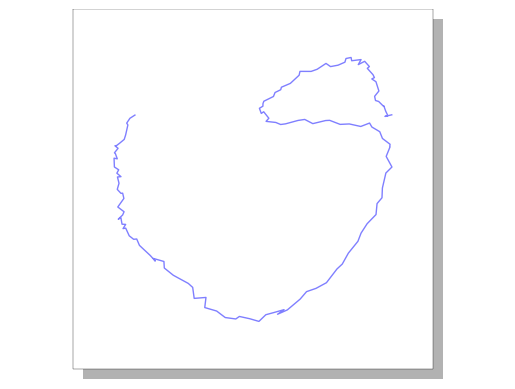

In [25]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.polygon(noisy_pts)
vsk.display()

We can also *condition* the extent of the noise based on some other factor, such as the Y coordinate of the point:

In [26]:
noise_by_x_pts = []
for coord in pts:
    factor = coord[1] * 0.1
    noise_by_x_pts.append([coord[0]+uniform(-factor, factor), coord[1]+uniform(-factor, factor)])

Here you can see that the line gets noisier as the Y coordinate gets further from 0 (in this sketch, further away from the horizontal midline):

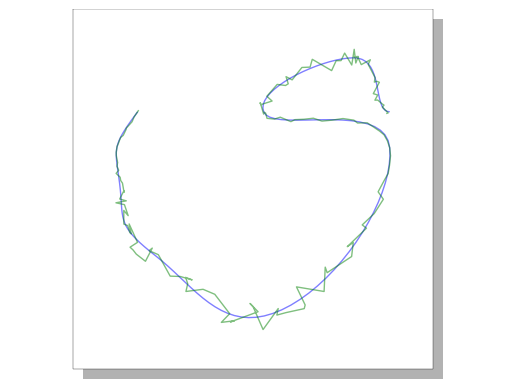

In [27]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pts)
vsk.stroke(2)
vsk.polygon(noise_by_x_pts)
vsk.display()

Here's an example of using Python's `enumerate()` function to tell us how far along the polyline we are in the `for` loop, and increasing the amount of noise as we approach the end of the polyline:

In [28]:
gradual_noise_pts = []
for i, coord in enumerate(pts):
    factor = (i / len(pts)) * 4 # goes from 0 to 4 as we traverse the list
    gradual_noise_pts.append([coord[0]+uniform(-factor, factor),
                              coord[1]+uniform(-factor, factor)])

Here's what that looks like:

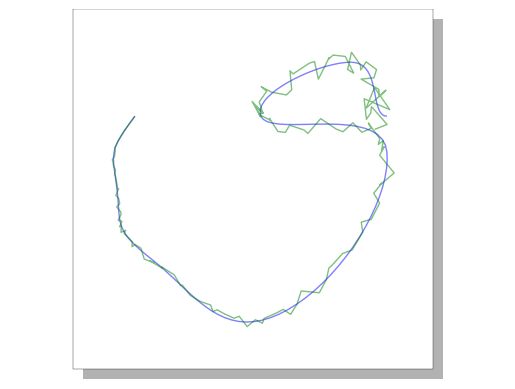

In [29]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pts)
vsk.stroke(2)
vsk.polygon(gradual_noise_pts)
vsk.display()

Using `enumerate()`, we can also selectively apply noise to a subset of points. The following example adds noise to every fifth point in the polyline:

In [30]:
skip_noise_pts = []
for i, coord in enumerate(pts):
    if i % 5 == 0:
        skip_noise_pts.append([coord[0]+uniform(-5, 5),
                              coord[1]+uniform(-5, 5)])
    else:
        skip_noise_pts.append(coord)

This gives us a nice spiky look:

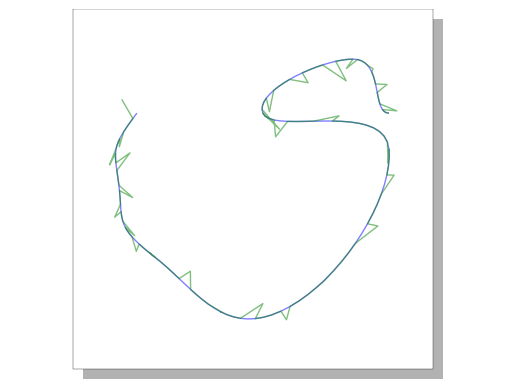

In [31]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pts)
vsk.stroke(2)
vsk.polygon(skip_noise_pts)
vsk.display()

**Exercise**: Make a variation on the above sketch where the noise is applied not every $n$ points, but at (approximately) evenly-spaced distances from the beginning to the end of the polyline.

**Advanced example**: One potential thing we can do here is create several variations on the same polyline, by adding noise to the polyline's points, then running it through Catmull-Rom. (In this example, I'm applying noise to our original polyline, not the Catmull-Rom spline in the previous examples.)

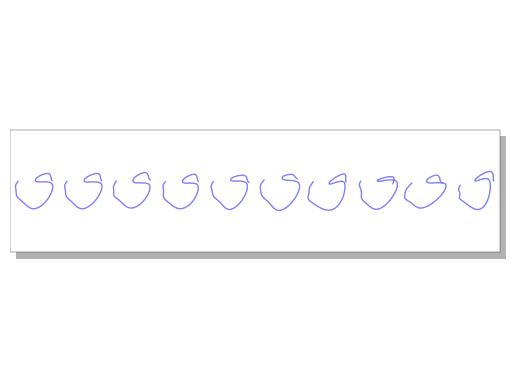

In [32]:
vsk = vsketch.Vsketch()
vsk.size("200mm", "50mm")
vsk.scale("1mm")
for i in range(10):
    # figures get noisier from left to right
    noisy = [[x+uniform(-i, i), y+uniform(-i, i)] for x, y in pline_combo]
    noisy_curve = Polyline(noisy).catmull_spline(-0.5).to_polyline(20)
    with vsk.pushMatrix():
        vsk.translate(-100 + (i * 20), 0)
        vsk.scale(0.2)
        vsk.polygon(noisy_curve)
vsk.display()

### Skews, sines, and more

Of course, we don't need to limit ourselves to randomness. We can apply *any* mathematical function to the points in the polyline. For example, you can [*shear* (or skew)](https://en.wikipedia.org/wiki/Shear_mapping) the polyline like so, by adding a factor of the Y coordinate to the X coordinate, and a factor of the X coordinate to the Y coordinate:

In [33]:
shear_pts = []
angle_x = np.pi * -0.25
angle_y = 0
for coord in pts:
    shear_pts.append([coord[0]+angle_x*coord[1],
                      coord[1]+angle_y*coord[0]])

Applying the shear with a zero Y angle and a slight X angle creates an italic effect:

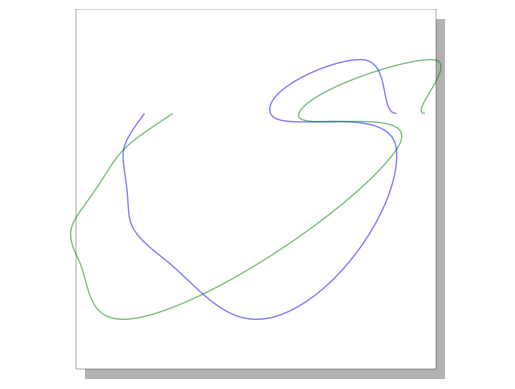

In [34]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pts)
vsk.stroke(2)
vsk.polygon(shear_pts)
vsk.display()

Using `enumerate()`, we can apply the shear effect differently along the polyline:

In [35]:
gradual_shear_pts = []
angle_x = np.pi * -0.25
angle_y = 0
for i, coord in enumerate(pts):
    factor = i / len(pts) # goes from 0 to 1
    gradual_shear_pts.append([coord[0]+angle_x*coord[1]*factor,
                      coord[1]+angle_y*coord[0]*factor])

You can see that this applies no shear at the beginning of the figure, escalating to full shear by the end:

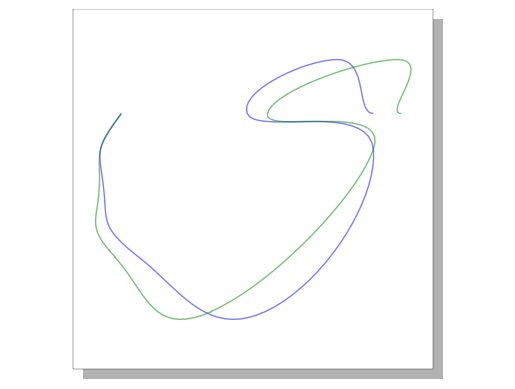

In [36]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pts)
vsk.stroke(2)
vsk.polygon(gradual_shear_pts)
vsk.display()

You can create a wavy line by applying a sine/cosine functions to each point, using either the position of that point:

In [37]:
wavy_pts = []
amp = 5 # adjust to make waves higher
freq_mult = 0.125 # adjust frequency of waves
for coord in pts:
    wavy_pts.append([coord[0] + np.sin(coord[0]*freq_mult)*amp,
                     coord[1] + np.cos(coord[1]*freq_mult)*amp])

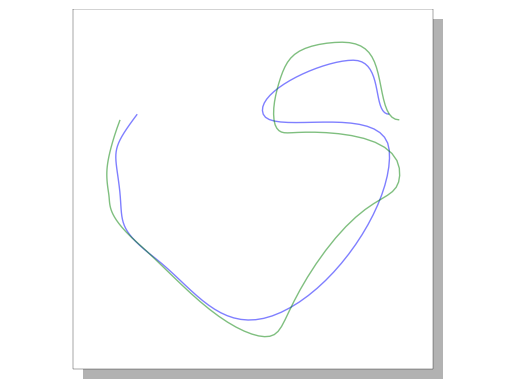

In [38]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pts)
vsk.stroke(2)
vsk.polygon(wavy_pts)
vsk.display()

... or the index of that point:

In [39]:
wavy_idx_pts = []
amp = 5 # adjust to make waves higher
freq_mult = 0.5 # adjust frequency of waves
for i, coord in enumerate(pts):
    wavy_idx_pts.append([coord[0] + np.sin(i*freq_mult)*amp,
                         coord[1] + np.cos(i*freq_mult)*amp])

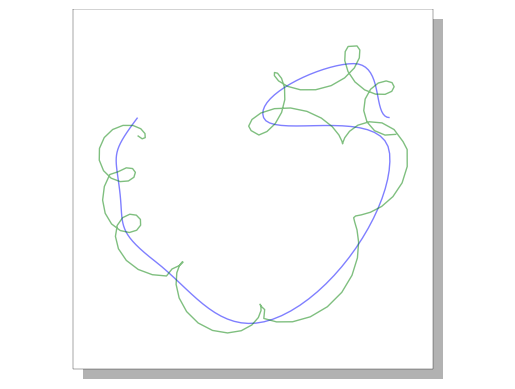

In [40]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(pts)
vsk.stroke(2)
vsk.polygon(wavy_idx_pts)
vsk.display()

(See [the Imitating Line Thickness notebook](imitating-line-thickness-variation.ipynb) for an example of performing variations along the normal of a polyline, e.g., at right angles to its direction of movement, rather than variations that depend on the X and Y coordinates.)

### Filtering polylines

Finally, we can write some Python code to *filter* polylines. For example, the following code returns a polyline with only points whose Y coordinate is greater than zero in our example polyline:

In [41]:
bottom_pline = []
for coord in pts:
    if coord[1] > 0:
        bottom_pline.append(coord)

Here's what it looks like when we draw it:

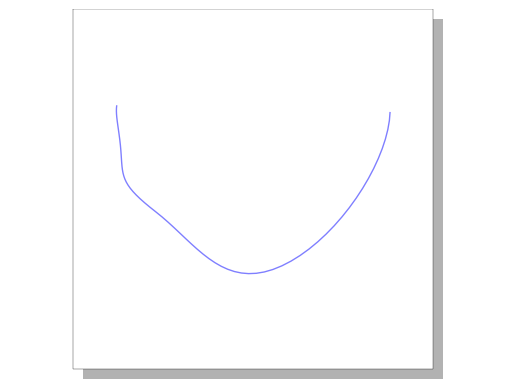

In [42]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.polygon(bottom_pline)
vsk.display()

Or we can grab only the portion of the polyline whose X coordinate is less than, say, 30:

In [43]:
left_pline = []
for coord in pts:
    if coord[0] < 30:
        left_pline.append(coord)

In this case, our "slice" of the polyline actually breaks that polyline into several slices that aren't connected. Our method for "filtering" a polyline is pretty crude, so you'll notice in the following sketch that there is a segment that connects (what should be) two discontinuous parts.

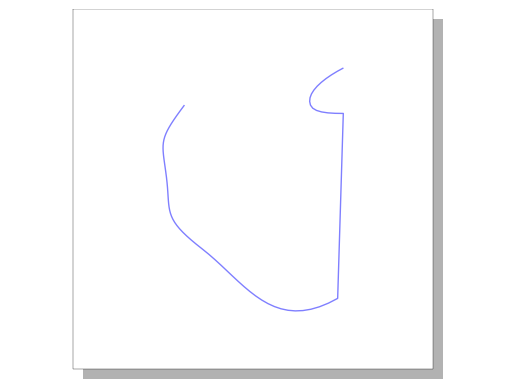

In [44]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.polygon(left_pline)
vsk.display()

**Advanced example**: Here's some code that draws polylines filtered from the original polyline, based on how far each point is from evenly-spaced points on the polyline:

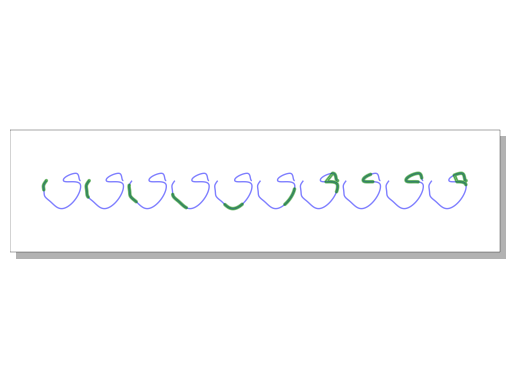

In [45]:
import math
vsk = vsketch.Vsketch()
vsk.size("200mm", "50mm")
vsk.scale("1mm")
# how many points to skip
step = int(len(pts) / 10)
# iterate from zero up to the number of points, with step
for i in range(0, len(pts), step):
    # only the points that are closer than 20mm to the current point
    filtered = [[x, y] for x, y in pts
                if math.dist([x, y], [pts[i][0], pts[i][1]]) < 20]
    with vsk.pushMatrix():
        vsk.translate(-100 + i*1.25, 0)
        vsk.scale(0.2)
        vsk.stroke(1)
        vsk.strokeWeight(1)
        vsk.polygon(pts)
        vsk.stroke(2)
        vsk.strokeWeight(4)
        vsk.polygon(filtered)
vsk.display()

## Asemic cursive example

Let's put all of these techniques together into one example, creating a page of asemic cursive writing. We'll do this by first writing a function that generates an asemic glyph, and then combine several of those glyphs into one "connected" glyph. We'll skew that slightly to give it a cursive look, and then filter it to remove subsets of points. Here's a function for generating a glyph:

In [46]:
def glyph():
    xgrid = [0, 0.5, 1, 1.5, 2]
    ygrid = [0, 0.333, 1, 1.333, 2]
    pts = []
    for i in range(6):
        pts.append([random.choice(xgrid), random.choice(ygrid)])
    return pts

Here's what one of these glyphs looks like:

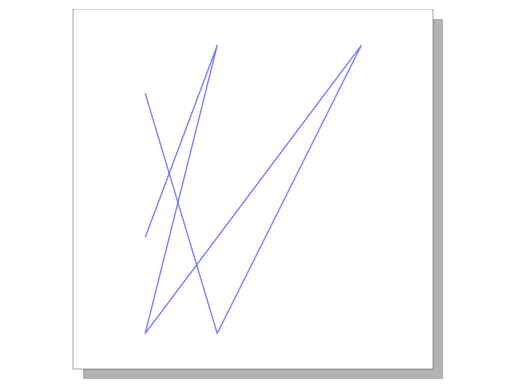

In [47]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(40)
    vsk.polygon(glyph())
vsk.display()

Now, we'll chain together several of these glyphs. In the code below, I generate $n$ glyphs. As I generate each glyph, I translate it over a bit (so it'll fall next to the previous glyph, instead of on top of it) and add it to the ongoing flat list of glyphs (which ends up being one big polyline):

In [51]:
cursive_line = []
for i in range(16):
    this_glyph = glyph()
    translated = [[x + i * 2.5, y] for x, y in this_glyph]
    cursive_line += translated

Here's what it looks like when we draw it:

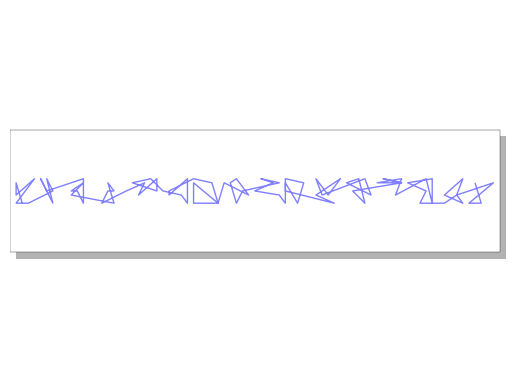

In [52]:
vsk = vsketch.Vsketch()
vsk.size("200mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.polygon(cursive_line)
vsk.display()

If we use Bezmerizing to turn this into a Bezier spline, we do indeed get something that looks like handwriting:

In [53]:
cursive_curve = Polyline(cursive_line).catmull_spline(-0.75).to_polyline(20)

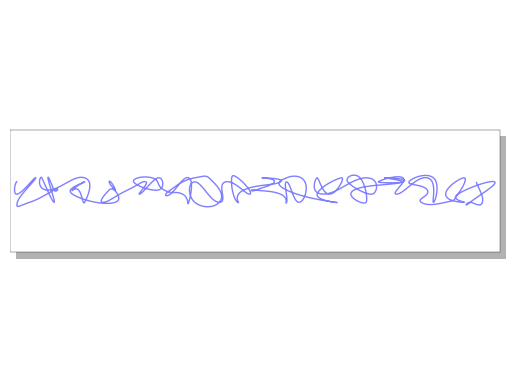

In [54]:
vsk = vsketch.Vsketch()
vsk.size("200mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.polygon(cursive_curve)
vsk.display()

Adding a bit of shear to this gives the effect of tilting the cursive to the right:

In [55]:
shear_cursive = []
angle_x = np.pi * -0.25
angle_y = 0
for coord in cursive_curve:
    shear_cursive.append([coord[0]+angle_x*coord[1],
                      coord[1]+angle_y*coord[0]])

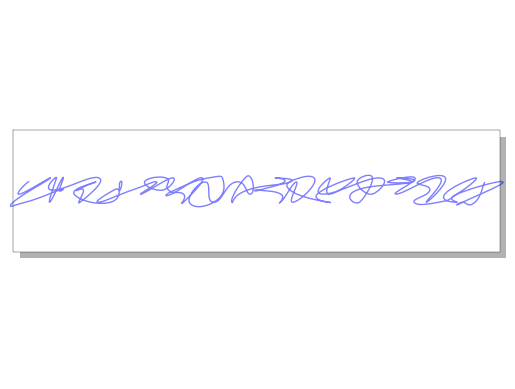

In [56]:
vsk = vsketch.Vsketch()
vsk.size("200mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.polygon(shear_cursive)
vsk.display()

Now (inspired by [Mirtha Dermisache](https://4columns.org/chejfec-sergio/mirtha-dermisache)), I'm going to cut off this cursive when it goes above or below a threshold on the Y axis:

In [57]:
cutoff_cursive = []
for coord in shear_cursive:
    if coord[1] > 0.25 and coord[1] < 1.75:
        cutoff_cursive.append(coord)

Here's the whole line with all of these transformations applied:

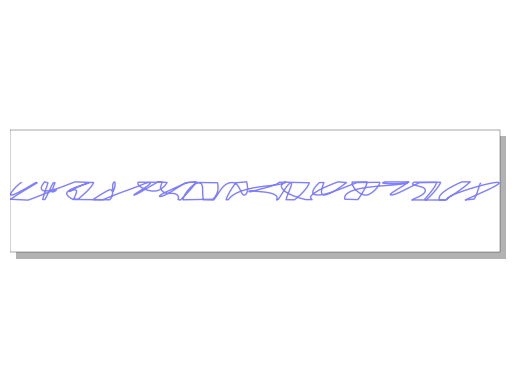

In [58]:
vsk = vsketch.Vsketch()
vsk.size("200mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.polygon(cutoff_cursive)
vsk.display()

Okay! Now I'm going to make a function that includes *all* of these steps, and parameterize as many of the variables as possible:

In [59]:
def clipped_cursive_line(pt_count=6,
                         n_glyphs=16,
                         spacing=2.5,
                         catmull=-0.5,
                         shear_angle=np.pi*-0.25,
                         top_cutoff=0.25,
                         bottom_cutoff=1.75):
    xgrid = [0, 0.5, 1, 1.5, 2]
    ygrid = [0, 0.333, 1, 1.333, 2]
    cursive_line = []
    # generate a number of glyphs
    for i in range(n_glyphs):
        pts = []
        for j in range(pt_count):
            pts.append([random.choice(xgrid), random.choice(ygrid)])
        # translate each glyph over
        translated = [[x + i * spacing, y] for x, y in pts]
        # add to the big polyline
        cursive_line += translated
    # polyline -> bezier spline -> curvy polyline
    cursive_curve = Polyline(cursive_line).catmull_spline(catmull).to_polyline(20)
    # shear
    shear_cursive = []
    for coord in cursive_curve:
        shear_cursive.append([coord[0]+shear_angle*coord[1], coord[1]])
    # cutoff
    cutoff_cursive = []
    for coord in shear_cursive:
        if coord[1] > 0.25 and coord[1] < 1.75:
            cutoff_cursive.append(coord)
    return cutoff_cursive

Here's the whole composition:

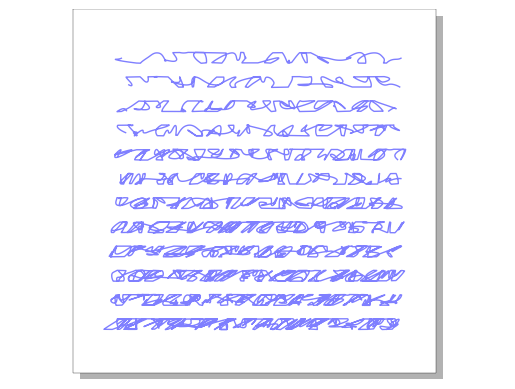

In [60]:
vsk = vsketch.Vsketch()
vsk.size("150mm", "150mm")
vsk.scale("1mm")
for i in range(12):
    with vsk.pushMatrix():
        vsk.translate(0, i * 10)
        vsk.scale(3)
        vsk.polygon(clipped_cursive_line(pt_count=3+i, shear_angle=i*-0.1))
vsk.display()

## Advanced: Doing all this stuff with numpy and Shapely (the cool way)

notes tk!